# Линейная регрессия (1D)

### Сгенерируйте синтетический набор точек вида y = ax+b+noise. Решите задачу линейной регрессии для множества точек (x, y). Поиск параметров произведите с помощью градиентного спуска. Результат — параметры линейной регрессии.

In [4]:
import numpy as np
from numpy import log, dot, e
from numpy.random import rand, multivariate_normal, shuffle
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
class LinearReg():
    
    def __init__(self, learning_rate=0.001, max_iter=10000):
        self.a = 0
        self.b = 0
        self.lr = learning_rate
        self.epochs = max_iter
    
    def fit(self, X, Y):
        n = float(len(X))
        for i in range(self.epochs): 
            Y_pred = self.a*X + self.b
            self.a = self.a - self.lr * (-2/n) * sum(X * (Y - Y_pred))
            self.b = self.b - self.lr * (-2/n) * sum(Y - Y_pred)
    
    def get_coef(self):
        return self.a, self.b
    
    def predict(self, X):
        return self.a * X + self.b

In [3]:
X = np.array(range(50))
Y = 2 * X + 5 + np.random.randn(len(X))
print('X:',X)
print('Y:',Y)
lr = LinearReg()

lr.fit(X,Y)
lr.get_coef()

X: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
Y: [  5.12317647   5.40348579  10.66664107  10.20730169  13.07384618
  15.14509894  16.51262438  18.96915174  20.56921823  20.89241249
  25.16571884  26.46068669  28.8227349   29.6086537   32.79632694
  34.31076031  39.98719944  38.94564634  41.05828237  42.30422848
  44.07775485  47.80374007  49.49777739  51.22501326  53.41194717
  54.97705598  56.47259874  57.69513769  62.34094294  61.48831864
  65.34423671  66.65345731  68.65853958  70.65489749  72.51879956
  74.58460487  75.63586912  78.42914458  80.59977441  82.7904863
  86.17246997  86.98298737  89.88254716  91.73783777  92.49217629
  94.52320489  97.51886908  97.60066575 100.40795585 103.58615907]


(2.003138130261077, 4.751830277712859)

# Логистическая регрессия (2D)

### Сгенерируйте два синтетических набора точек на плоскости, добавьте им метки классов (2 класса). Визуализируйте множества (matplotlib). Разделите данные на тренировочный и тестовый набор. Реализуйте логистическую регрессию. Проверьте точность полученного алгоритма с помощью метрики accuracy (на тестовом множестве).

In [1]:
class LogisticReg:
    
    def __init__(self, lr=0.01, max_iter=1000):
        self.lr = lr
        self.epochs = max_iter
    
    @staticmethod
    def sigmoid(z):
        return 1 / (1 + e**(-z))
    
    def cost_function(self, X, Y, weights):                 
        z = dot(X, weights)
        predict_1 = Y * log(self.sigmoid(z))
        predict_0 = (1 - Y) * log(1 - self.sigmoid(z))
        return -sum(predict_1 + predict_0) / len(X)
    
    def fit(self, X, Y):
        X = np.c_[X, np.ones(X.shape[0])]    
        weights = rand(X.shape[1])
        N = len(X)
                 
        for _ in range(self.epochs):        
            Y_pred = self.sigmoid(dot(X, weights))
            weights -= self.lr * dot(X.T,  Y_pred - Y) / N
            
        self.weights = weights
    
    def predict(self, X):
        X = np.c_[X, np.ones(X.shape[0])] 
        z = dot(X, self.weights)
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]
    
    def predict_proba(self, X):
        X = np.c_[X, np.ones(X.shape[0])] 
        z = dot(X, self.weights)
        return np.array((self.sigmoid(z),1-self.sigmoid(z))).T

In [2]:
def generate_dataset():
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 100]]
    
    mean2 = [10, 10]
    cov2 = [[10, 0], [0, 30]]
    
    class1 = multivariate_normal(mean1, cov1, 1000)
    class2 = multivariate_normal(mean2, cov2, 1000)
    
    X = np.concatenate((class1, class2), axis=0)
    Y = np.concatenate((np.array([0] * 1000), np.array([1]*1000)))
    return X,Y
    
def train_test_split(X, Y, test_fraction=0.3):
    indices = np.random.permutation(X.shape[0])
    train_size = int(X.shape[0] * (1 - test_fraction))
    training_idx, test_idx = indices[:train_size], indices[train_size:]
    return X[training_idx,:], X[test_idx,:], Y[training_idx], Y[test_idx]

### split data

<AxesSubplot:>

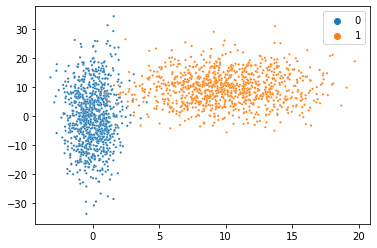

In [5]:
X,Y = generate_dataset()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
sns.scatterplot(x=X[:,0], y=X[:,1], s=5, hue=Y)

### sigmoid

In [6]:
log_reg = LogisticReg()
log_reg.fit(X_train,Y_train)
Y_pred = log_reg.predict(X_test)
print('Accuracy: ',np.mean(Y_pred==Y_test))

Accuracy:  0.9866666666666667


[(-5.0, 20.0), (-30.0, 40.0)]

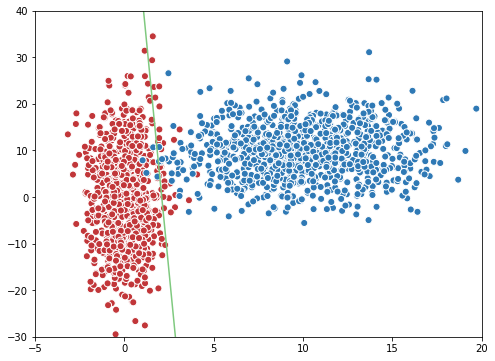

In [7]:
xx, yy = np.mgrid[-50:50:.1, -50:50:.1]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = log_reg.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="Accent", vmin=0, vmax=10000)

ax.scatter(X[100:,0], X[100:, 1], c=Y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(xlim=(-5, 20), ylim=(-30, 40))

# Дерево принятия решений (2D)

### Рассмотрите те же данные, что и в задании 2. Разделите точки на классы с помощью алгоритма CART(gini criterion). Ограничьте глубину дерева (по вашему выбору). Проверьте точность полученного алгоритма с помощью метрики accuracy на тестовом наборе.

In [23]:
'''generation'''
labels = np.random.randint(0, 2, 200)
noise = 0.6
x = (np.random.rand(200) + labels) / 2
y = x*(-1) + np.random.rand(200) * noise

x = x.reshape(-1, 1)*200
y = y.reshape(-1, 1)*200
labels = labels.reshape(-1, 1)
data= np.hstack([x,y,labels]).astype("int")

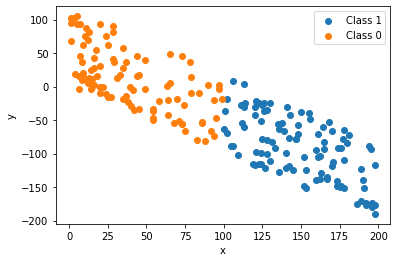

In [24]:
plt.scatter(data[:,0][data[:,2] ==1], data[:,1][data[:,2] ==1], label='Class 1')
plt.scatter(data[:,0][data[:,2] ==0], data[:,1][data[:,2] ==0], label='Class 0')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### split data

In [25]:
np.random.shuffle(data)
train_x,train_y = data[:,[0,1]][:70],data[:,2][:70]
test_x,test_y = data[:,[0,1]][70:],data[:,2][70:]


In [26]:
def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

In [27]:
class DecisionTree:

    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        if not self.n_feats:
            self.n_feats = X.shape[1]
        else:
            self.n_feats = min(self.n_feats, X.shape[1])
        # taking X and y
        # creating tree
        self.root = self._create_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _create_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping  working
        if (depth >= self.max_depth or n_labels == 1  or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            # returning Node
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        
        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._create_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._create_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_entropy = entropy(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common
    
    
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

In [28]:
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

clf = DecisionTree(max_depth=10)
clf.fit(train_x,train_y )
    
y_pred = clf.predict(test_x)
acc = accuracy(test_y,y_pred)

print ("Accuracy:", acc)

Accuracy: 0.9538461538461539
